# Problem Statement: To analysis the doctors consultation fees dataset and to train and build a model which would help us predict the consultation fees

In [1]:
import numpy as np
import pandas as pd
# For Visualization of data we would import
import matplotlib.pyplot as plt
import seaborn as sns
#For preprocessing like scaling,encoding we would import
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#for model selection we import
import sklearn.model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#For measuring the performance of the model we will import
from sklearn.metrics import mean_squared_error,mean_absolute_error
#Ensembleling
from sklearn.ensemble import RandomForestRegressor
#For saving the file we would import
import pickle


In [2]:
#Now that we have imported all the necessary files lets start with our EDA process

In [3]:
train_data='C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master (1)/Data-Science-ML-Capstone-Projects-master/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx'
tset_data='C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master (1)/Data-Science-ML-Capstone-Projects-master/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx'

In [4]:
train=pd.read_excel(train_data)
test=pd.read_excel(tset_data)

In [5]:
#Lets check the dataset

In [6]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [7]:
train.info()#lets check the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
#Observation most of the columns in the dataset are objects and only our target variable is of integer type

In [9]:
#Now lets check the test data

In [10]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [12]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [13]:
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [14]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [15]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [16]:
#lets check the stastical description of the dataset

In [17]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [18]:
#As most of our data is in object form we are not able to geta statistical analysis about our data so we have to first treat the data

In [19]:
#We would be first treating the Miscellaneous_Info column
#As this column has special characters and spaces we would convert all non null values to '1' and null to '0'

In [20]:
for i in train['Miscellaneous_Info'].value_counts().index:
    train['Miscellaneous_Info'].replace(i,int(1),inplace=True)
    train['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [21]:
#Similarly treating the test data miscellaneous info column

In [22]:
for i in test['Miscellaneous_Info'].value_counts().index:
    test['Miscellaneous_Info'].replace(i,int(1),inplace=True)
    test['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [23]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,1,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,1,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,0,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,1,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,1,250


In [24]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,0
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,1
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,1


In [25]:
#Let's treat Experience column and extract numerical values i.e experience
train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [26]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,1,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,1,350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,0,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,1,250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,1,250


In [27]:
#Let's treat Experience column and extract numerical values i.e experience for test data
test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

In [28]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,0
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,1
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,1


In [29]:
#Now lets extract locality and city from place column in train dataframe

In [30]:
train.Place.fillna('None,None',inplace=True)

train['locality'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]

#Now we can drop the place variable
train.drop('Place',axis=1,inplace=True)

In [31]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,1,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,1,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,1,250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,1,250,Keelkattalai,Chennai


In [32]:
train['city'].isnull().sum()

1

In [33]:
test['Place'].fillna('None,None',inplace=True)

test['locality'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]

#Now we can drop the place variable
test.drop('Place',axis=1,inplace=True)

In [34]:
test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,NaN,General Medicine,0,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,0,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70%,Dermatologists,1,KK Nagar,Chennai
3,BAMS,0,NaN,Ayurveda,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Dentist,1,Kanakpura Road,Bangalore


In [35]:
train['Rating'].fillna('-99%',inplace=True)
test['Rating'].fillna('-99%',inplace=True)

for i in train['Rating'].value_counts().index:
  train['Rating'].replace(i,int(i[:-1]),inplace=True)

for i in test['Rating'].value_counts().index:
  test['Rating'].replace(i,int(i[:-1]),inplace=True)

In [36]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,1,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,1,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-99,ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,-99,Ayurveda,1,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,1,250,Keelkattalai,Chennai


In [37]:
test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,-99,General Medicine,0,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,-99,ENT Specialist,0,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,1,KK Nagar,Chennai
3,BAMS,0,-99,Ayurveda,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,1,Kanakpura Road,Bangalore


In [38]:
train['Qualification'].value_counts()


BDS                                                                                              488
BHMS                                                                                             477
BAMS                                                                                             471
MBBS                                                                                             334
MBBS, MS - ENT                                                                                   220
                                                                                                ... 
BDS, MDS - Periodontics, Diploma in Implanthology                                                  1
BAMS, M. D. IN KAYACHIKISTA, PhD- Ayurveda                                                         1
BDS, Fellowship and Diplomate in Implantology from ICOI (USA), Certificate in Dental Implants      1
Certificate of Oral Implantology, Certification in Laser Dentistry, BDS                    

In [39]:
train['Qualification'].value_counts().unique()

array([488, 477, 471, 334, 220, 178, 177, 140,  93,  92,  84,  82,  68,
        66,  63,  57,  52,  45,  44,  43,  41,  37,  32,  31,  29,  27,
        25,  24,  23,  21,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [40]:
train['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

In [41]:
#Lets break qualification into columns and features whether present r not by adding '0' and '1'
def fun(qual,string):
  for data in dataf:
    if data.find(string) !=-1:
      qual.append(int(1))
    else :
      qual.append(int(0))
def to_df(ds):
  ds=pd.DataFrame(ds)
  return ds

cols=['MBBS','BHMS','BAMS','DDVL','DLO','MDS','DNB','BDS','MD','MS','Fellowship']

In [42]:
dataf=train['Qualification']

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mds=[]
dnb=[]
ddvl=[]
ms=[]

fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mds,'MDS')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

MBBS=to_df(mbbs)
BDS=to_df(bds)
BAMS=to_df(bams)
MD=to_df(md)
BHMS=to_df(bhms)
Fellowship=to_df(fellowship)
DLO=to_df(dlo)
MDS=to_df(mds)
DNB=to_df(dnb)
DDVL=to_df(ddvl)
MS=to_df(ms)

train.drop('Qualification',1,inplace=True)
train=pd.concat([MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,Fellowship,train],axis=1)


In [43]:
mx=train.columns[11:]
for i in mx:
  cols.append(i)
train.columns=cols
train.head()

,MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,Fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,0,1,0,0,0,0,0,0,1,1,0,24,100,Homeopath,1,100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98,Ayurveda,1,350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,-99,ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,-99,Ayurveda,1,250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100,Ayurveda,1,250,Keelkattalai,Chennai


In [44]:
dataf=test['Qualification']

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mds=[]
dnb=[]
ddvl=[]
ms=[]

fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mds,'MDS')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

MBBS=to_df(mbbs)
BDS=to_df(bds)
BAMS=to_df(bams)
MD=to_df(md)
BHMS=to_df(bhms)
Fellowship=to_df(fellowship)
DLO=to_df(dlo)
MDS=to_df(mds)
DNB=to_df(dnb)
DDVL=to_df(ddvl)
MS=to_df(ms)

test.drop('Qualification',1,inplace=True)
test=pd.concat([MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,Fellowship,train],axis=1)
cols=['MBBS','BHMS','BAMS','DDVL','DLO','MDS','DNB','BDS','MD','MS','Fellowship']
mx=test.columns[11:]
for i in mx:
  cols.append(i)
test.columns=cols
test.head()

,MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,...,MD,MS,Fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,24,100,Homeopath,1,100,Kakkanad,Ernakulam
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,12,98,Ayurveda,1,350,Whitefield,Bangalore
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,9,-99,ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,12,-99,Ayurveda,1,250,Bannerghatta Road,Bangalore
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,20,100,Ayurveda,1,250,Keelkattalai,Chennai


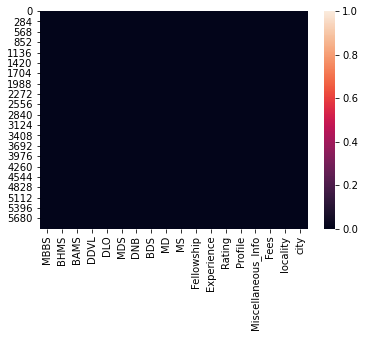

In [45]:
sns.heatmap(train.isnull())

In [46]:
#Now lets find the correlation between different columns of the dataset
train.corr()

,MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,Fellowship,Experience,Rating,Miscellaneous_Info,Fees
MBBS,1.000000,-0.355083,-0.358911,0.170506,0.214593,-0.360381,0.263156,-0.512244,0.010029,-0.318008,0.096211,0.271347,0.017869,-0.030565,0.271038
BHMS,-0.355083,1.000000,-0.145019,-0.063111,-0.081865,-0.144801,-0.102542,-0.206141,-0.129913,0.501036,-0.061193,-0.114191,-0.098213,-0.129822,-0.002423
BAMS,-0.358911,-0.145019,1.000000,-0.063785,-0.082739,-0.146346,-0.103636,-0.208341,-0.146858,0.506383,-0.059319,-0.047150,-0.157667,-0.195451,-0.139891
DDVL,0.170506,-0.063111,-0.063785,1.000000,-0.036007,-0.063689,0.028751,-0.090668,-0.104961,-0.123810,0.030129,-0.082192,0.078936,0.062056,0.071667
DLO,0.214593,-0.081865,-0.082739,-0.036007,1.000000,-0.082615,0.192757,-0.117612,-0.158627,-0.021523,-0.010276,0.107496,-0.008508,-0.044340,0.020202
MDS,-0.360381,-0.144801,-0.146346,-0.063689,-0.082615,1.000000,-0.099492,0.662902,0.480408,-0.282729,-0.007237,-0.118095,0.190198,0.266562,-0.086650
DNB,0.263156,-0.102542,-0.103636,0.028751,0.192757,-0.099492,1.000000,-0.142564,-0.102096,-0.089904,0.067729,-0.022369,0.040551,0.037370,0.140918
BDS,-0.512244,-0.206141,-0.208341,-0.090668,-0.117612,0.662902,-0.142564,1.000000,0.165631,-0.402293,-0.008153,-0.196268,0.220112,0.337009,-0.198635
MD,0.010029,-0.129913,-0.146858,-0.104961,-0.158627,0.480408,-0.102096,0.165631,1.000000,-0.343913,0.016798,-0.031598,0.174225,0.194060,0.095383
MS,-0.318008,0.501036,0.506383,-0.123810,-0.021523,-0.282729,-0.089904,-0.402293,-0.343913,1.000000,-0.073964,-0.029452,-0.188155,-0.250908,-0.003847


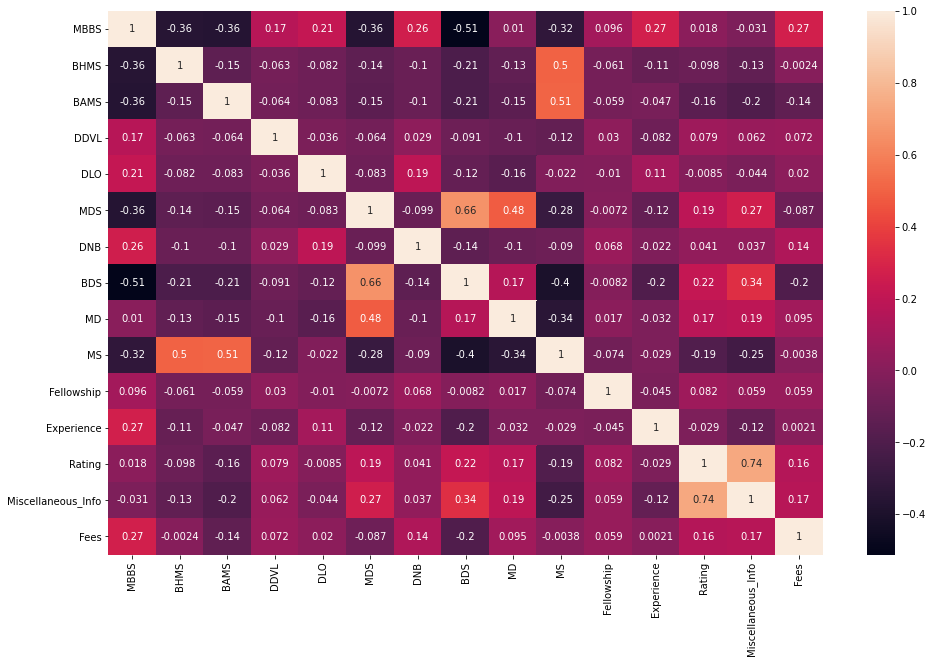

In [47]:
#Now lets plot the correlation using heatmap to understand the correlation using visualization
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True)

In [48]:
le=LabelEncoder()
train['Profile']=le.fit_transform(train['Profile'])

In [49]:
train['Profile'].unique()

array([5, 0, 3, 1, 4, 2])

In [50]:
test['Profile']=le.fit_transform(test['Profile'])

In [51]:
train['locality']=le.fit_transform(train['locality'])

In [52]:
train['locality'].unique()

array([296, 856, 452,  68, 335, 605, 324,  33, 541,  39, 776, 728, 131,
       285, 362, 692, 760, 614, 288, 226, 600, 815, 111, 765,  26, 581,
       385, 802, 147,  67, 726,  95, 474, 247, 668, 527,  90, 675, 428,
       244, 144, 622, 607,  72, 493,   1, 416, 194, 115, 840, 862, 355,
       435, 557, 503, 574, 460, 110,  28, 238,   5, 612, 424, 302,  40,
       400,  19, 641, 706, 536, 468, 669, 201, 272, 554, 490, 789, 478,
       535,  31,  65, 311, 216, 421, 143, 477, 365, 752, 291, 212,  86,
       750, 861, 233, 542, 141, 249, 590, 702, 849, 344, 207,  52, 522,
        49,  35, 103, 797, 219, 214, 562, 775, 730, 315, 598,  61, 358,
       388, 800, 443, 195, 864,  45,  71, 430, 833, 361,  27, 743,   8,
       384, 402, 771, 161,  80, 268, 627, 729, 337, 583, 316, 767, 857,
       850, 550, 101, 116, 575, 497, 397, 455, 154, 830,  16, 567,  14,
       513, 346, 155, 394,  75, 306, 239, 206, 819, 199, 488, 865, 200,
       754, 807, 858, 366, 676, 825,  96, 695,  48, 640, 412, 43

In [53]:
test['locality']=le.fit_transform(test['locality'])

In [54]:
train['city'].isnull().sum()

1

In [55]:
train.dropna()

,MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,Fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,0,1,0,0,0,0,0,0,1,1,0,24,100,5,1,100,296,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98,0,1,350,856,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,-99,3,0,300,452,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,-99,0,1,250,68,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100,0,1,250,335,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,1,0,19,98,3,1,300,70,Bangalore
5957,1,0,0,0,0,0,0,0,0,0,0,33,-99,4,0,100,536,Chennai
5958,1,0,0,0,0,0,0,0,0,0,0,41,97,4,1,600,215,Delhi
5959,1,0,0,0,0,0,0,0,1,0,0,15,90,4,1,100,841,Mumbai


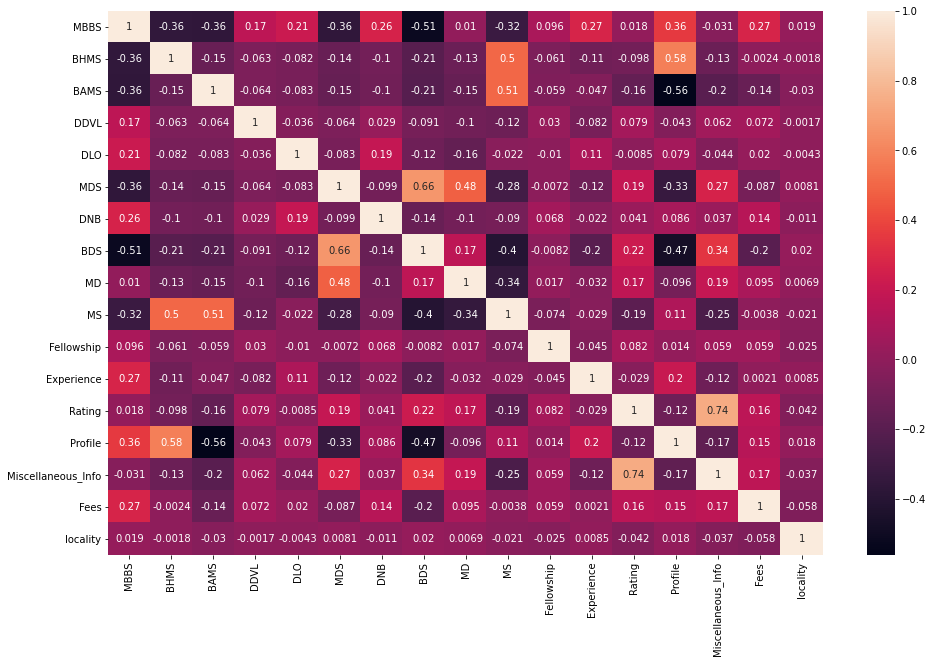

In [56]:
#Now we have converted our categorical column to numerical format now lets again plot and check what happens
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True)

MBBS                     AxesSubplot(0.125,0.816017;0.168478x0.0639831)
BHMS                  AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
BAMS                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
DDVL                  AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
DLO                      AxesSubplot(0.125,0.739237;0.168478x0.0639831)
MDS                   AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
DNB                   AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
BDS                   AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
MD                       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
MS                    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
Fellowship            AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
Experience            AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
Rating                   AxesSubplot(0.125,0.585678;0.168478x0.0639831)
Profile               AxesSubplot(0.327174,0.585678;0.168478x0.0

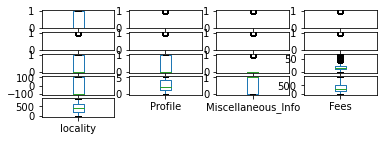

In [57]:
#Now lets check for outliers
train.plot(kind='box',subplots=True,layout=(10,4))

In [58]:
train.drop(['city'],axis=1)

,MBBS,BHMS,BAMS,DDVL,DLO,MDS,DNB,BDS,MD,MS,Fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality
0,0,1,0,0,0,0,0,0,1,1,0,24,100,5,1,100,296
1,0,0,1,0,0,0,0,0,1,1,0,12,98,0,1,350,856
2,1,0,0,0,0,0,0,0,0,1,0,9,-99,3,0,300,452
3,0,0,1,0,0,0,0,0,0,1,0,12,-99,0,1,250,68
4,0,0,1,0,0,0,0,0,0,1,0,20,100,0,1,250,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,1,0,19,98,3,1,300,70
5957,1,0,0,0,0,0,0,0,0,0,0,33,-99,4,0,100,536
5958,1,0,0,0,0,0,0,0,0,0,0,41,97,4,1,600,215
5959,1,0,0,0,0,0,0,0,1,0,0,15,90,4,1,100,841


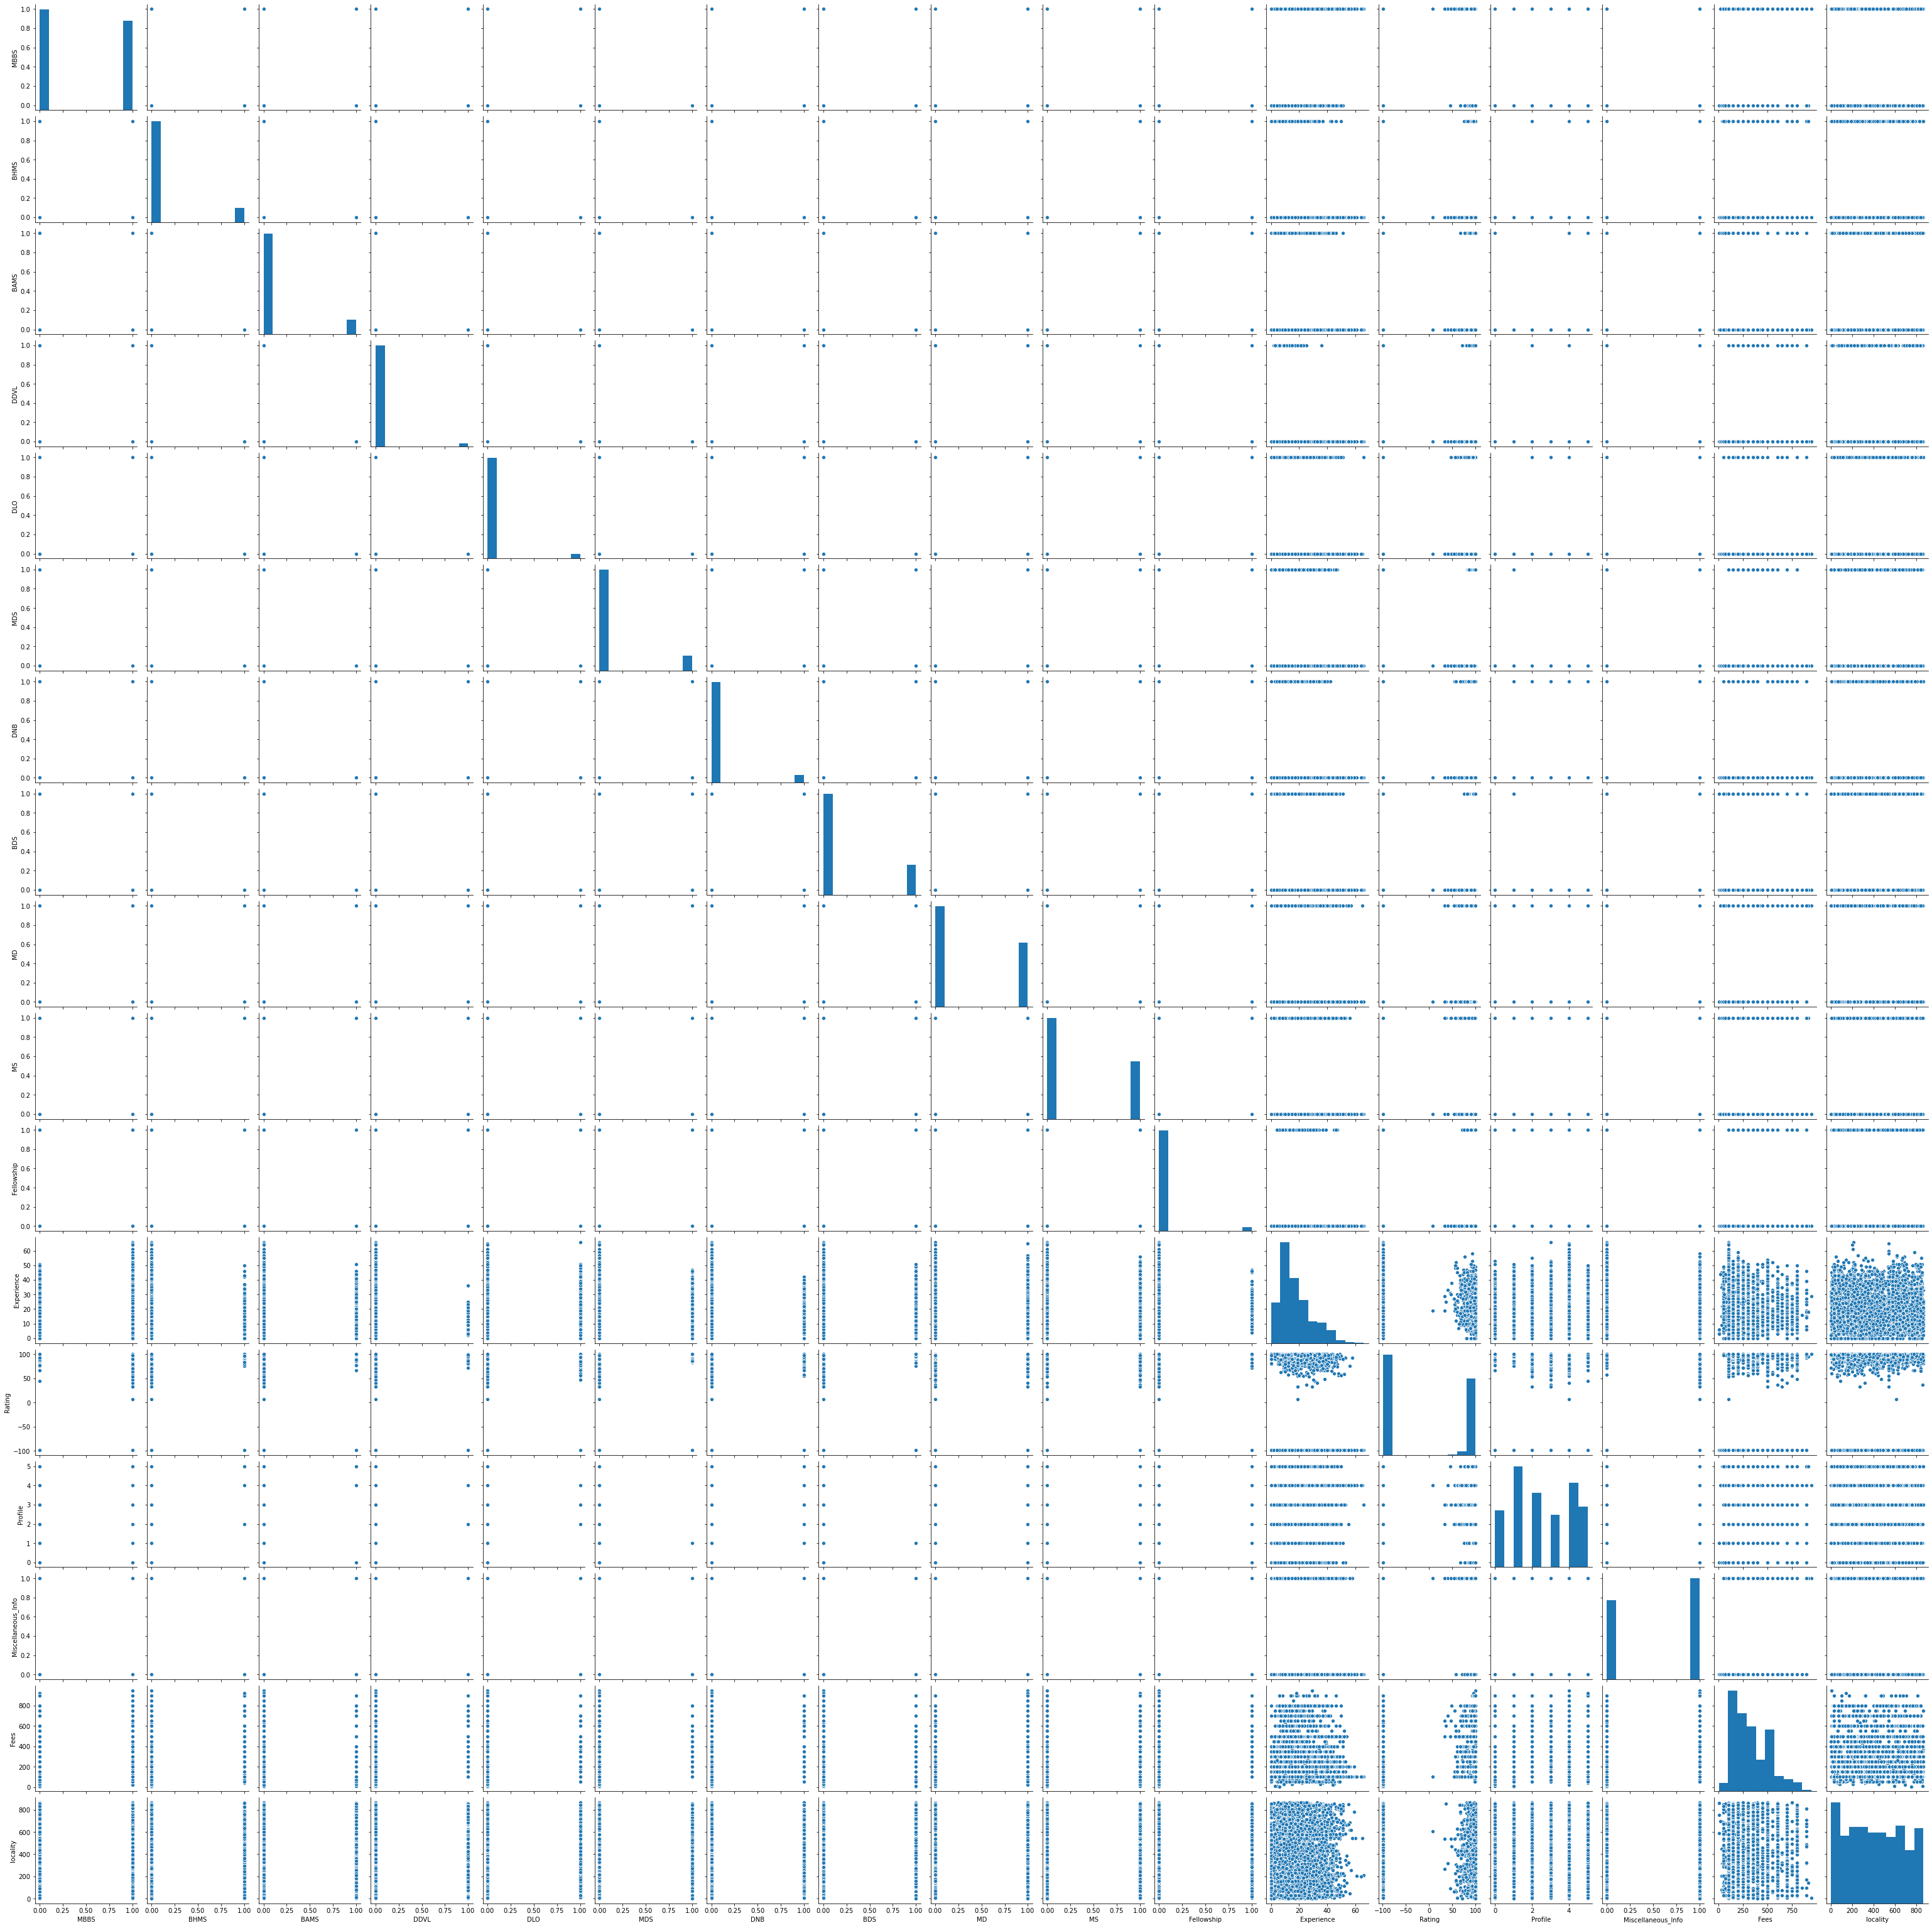

In [59]:
sns.pairplot(train)

In [61]:
#Lets check for skewness in the dataset
train.skew()

MBBS                  0.118000
BHMS                  2.261706
BAMS                  2.229777
DDVL                  5.836930
DLO                   4.412061
MDS                   2.234292
DNB                   3.424233
BDS                   1.293695
MD                    0.461151
MS                    0.566815
Fellowship            5.056751
Experience            0.991089
Rating                0.225184
Profile               0.108803
Miscellaneous_Info   -0.243756
Fees                  0.751870
locality              0.109516
dtype: float64

In [63]:
y=train.iloc[:,15:16]#setting output for new data after removing outliers

x=train.drop(['Fees'],axis=1)


In [64]:
x.shape

(5961, 17)

In [65]:
y.shape

(5961, 1)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [70]:
x_train.shape

(3993, 17)

In [71]:
y_train.shape

(3993, 1)

In [72]:
x_test.shape

(1968, 17)

In [73]:
y_test.shape

(1968, 1)

In [74]:
from sklearn.metrics import r2_score

In [75]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\n************For model',m,'******************')
    print('Predicted rate is:',predm,'for model',m)
    print('\nActual rate is:',(y_test),'for model',m)
    print("\nError")
    print("\nMean absolute error is",mean_absolute_error(y_test,predm),'for model',m)
    print("\nMean Squared error is",mean_squared_error(y_test,predm),'for model',m)
    print("\nSquared root of mean squared error is",np.sqrt(mean_squared_error(y_test,predm)),'for model',m)
    print("\nR2 Score is",r2_score(y_test,predm),'for model',m)

ValueError: could not convert string to float: ' Hyderabad'

In [76]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print('\nPredicted rate is:',pred)
print('\nActual rate is:',(y_test))
print("\nError")
print("\nMean absolute error is",mean_absolute_error(y_test,pred))
print("\nMean Squared error is",mean_squared_error(y_test,pred))
print("\nSquared root of mean squared error is",np.sqrt(mean_squared_error(y_test,pred)))
print("\nR2 Score is",r2_score(y_test,pred))

ValueError: could not convert string to float: ' Hyderabad'

In [77]:
#From The above model scores we come to the conclusion that Linear Regression has the highest R2score now we would save our best model

In [86]:
filename='picklecovid19usrf.pkl'
pickle.dump(lr,open(filename,'wb'))

In [ ]:
#Now we have saved the pickle file of our best model going further we would load the model and then predict mortality rate as an when needed